In [271]:
# Célula 1: Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.neural_network import MLPRegressor


In [272]:
# Célula 2: Dados de entrada (Ano do carro, Quilometragem)
X = np.array([[2010, 120000],  
              [2015, 80000],  
              [2018, 50000],  
              [2020, 30000]])  

# Preços dos carros (em milhares de reais)
y = np.array([[25], [40], [55], [70]])


In [273]:
# Célula 3: Treinando a rede neural
modelo = MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)
modelo.fit(X, y.ravel())  # Usamos .ravel() para achatar y para o formato esperado

# Verificando o score de treinamento
print(f"Score de treinamento: {modelo.score(X, y)}")


Score de treinamento: -7.764134747855774


c:\Users\USER\Downloads\jupyter\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [274]:
# Célula 4: Acessando pesos e bias do modelo treinado
pesos = modelo.coefs_[0]  # Pesos da primeira camada (ano e quilometragem)
bias = modelo.intercepts_[0]  # Bias da primeira camada


In [275]:
# Célula 5: Novo carro para previsão (Ano = 2017, Quilometragem = 60.000)
novo_carro = np.array([[2020, 70000]])

# Normalizando os dados para evitar grandes discrepâncias
# Normalização simples (transforma os valores para uma escala mais próxima)
X_normalizado = (X - X.mean(axis=0)) / X.std(axis=0)
novo_carro_normalizado = (novo_carro - X.mean(axis=0)) / X.std(axis=0)

# Ajustando o modelo com uma rede neural mais precisa
modelo = MLPRegressor(hidden_layer_sizes=(5,), max_iter=5000, random_state=1)
modelo.fit(X_normalizado, y.ravel())

# Fazendo a previsão com o modelo treinado
preco_previsto = modelo.predict(novo_carro_normalizado)
print(f"Preço previsto com o modelo: R$ {preco_previsto[0]:,.2f} mil")



Preço previsto com o modelo: R$ 53.70 mil


c:\Users\USER\Downloads\jupyter\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


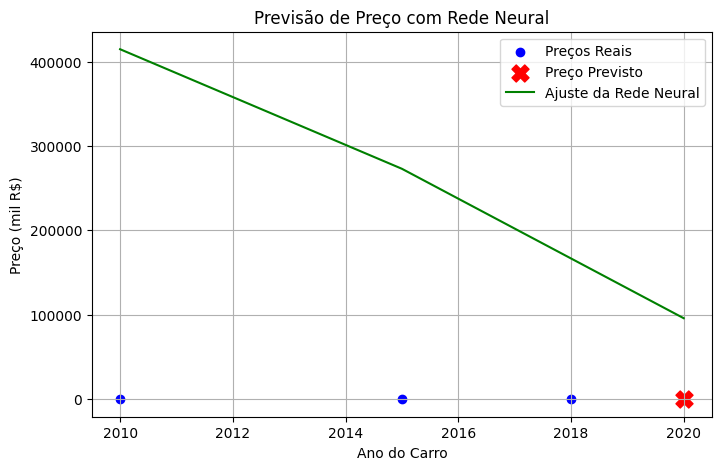

In [276]:
# Célula 6: Criando o gráfico
plt.figure(figsize=(8, 5))

# Dados reais (pontos azuis)
plt.scatter(X[:, 0], y, color='blue', label="Preços Reais")

# Previsão para o novo carro (ponto vermelho)
plt.scatter(novo_carro[:, 0], preco_previsto, color='red', label="Preço Previsto", marker='X', s=150)

# Linhas conectando os pontos
plt.plot(X[:, 0], modelo.predict(X), color='green', label="Ajuste da Rede Neural")

# Rótulos e título
plt.xlabel("Ano do Carro")
plt.ylabel("Preço (mil R$)")
plt.title("Previsão de Preço com Rede Neural")
plt.legend()
plt.grid(True)

# Adicionando interatividade (mostra valores ao passar o mouse)
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Ano: {sel.target[0]:.0f}\nPreço: {sel.target[1]:.2f} mil R$"))

# Exibir o gráfico
plt.show()
